#Boosting Techniques | **Assignment**

## Question 1: What is Ensemble Learning in machine learning? Explain the key idea behind it


**Answer**: Boosting is an ensemble learning technique that combines many weak learners (models that perform just slightly better than random guessing, like shallow decision trees) into one strong learner.

* It works sequentially: each model is trained to fix the mistakes of the previous one.

* Misclassified samples are given higher weights, so later learners focus more on difficult cases.

* The final model combines all learners using weighted voting or averaging.

Why it helps: Boosting gradually reduces bias and improves accuracy by making weak models complement each other. However, if not regularized, it may sometimes cause overfitting.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?



**Answer**: Difference Between AdaBoost and Gradient Boosting

1. AdaBoost (Adaptive Boosting):

   * Trains learners sequentially.
   * After each model, it reweights the training samples → misclassified samples get higher weights.
   * The next learner focuses more on correcting those hard cases.
   * Emphasizes reweighting data points.

2. Gradient Boosting:

   * Also trains learners sequentially.
   * Instead of reweighting samples, it fits each new learner to the residual errors (gradients of loss function) of the previous model.
   * Uses gradient descent to minimize the overall loss.
   * Emphasizes optimizing a loss function.

## Question 3: How does regularization help in XGBoost?


**Answer**:
*Regularization in XGBoost*

* XGBoost includes regularization terms in its objective function (both L1 and L2 penalties) to control model complexity.

* L1 (Lasso penalty): Encourages sparsity, helps in feature selection.

* L2 (Ridge penalty): Reduces large weights, prevents overfitting.

* By penalizing complex trees, XGBoost improves generalization, reduces overfitting, and makes the model more robust.

## Question 4: Why is CatBoost considered efficient for handling categorical data?



**Answer**: CatBoost is considered highly efficient for handling categorical features because:

1. Built-in Encoding:

   * Unlike other algorithms, CatBoost doesn’t need one-hot encoding or label encoding.

   * It uses “ordered target statistics” (also called mean encoding with permutation) to convert categories into numerical values without causing target leakage.

2. Handles High Cardinality:

   * Works well even with categorical features having many unique values.

3. Efficiency & Accuracy:

   * Reduces preprocessing time.

   * Provides better accuracy by capturing categorical patterns naturally.

## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?



**Answer**:
Boosting techniques (AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost) are often preferred when high accuracy and bias reduction are critical. Some applications are:

1. Finance:

   * Credit scoring, fraud detection, loan default prediction.

   * Boosting handles complex decision boundaries better.

2. Healthcare:

   * Disease prediction, medical image classification.

   * Captures subtle patterns in data.

3. E-commerce & Marketing:

   * Customer churn prediction, product recommendation.

   * Learns from imbalanced datasets effectively.

4. Cybersecurity:

   * Spam detection, intrusion detection.
  
   * Boosting improves detection of rare but critical cases.

##Datasets:
##● Use sklearn.datasets.load_breast_cancer() for classification tasks.
##● Use sklearn.datasets.fetch_california_housing() for regression tasks.

## Question 6: Write a Python program to:
##● Train an AdaBoost Classifier on the Breast Cancer dataset
##● Print the model accuracy

In [1]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)

AdaBoost Classifier Accuracy: 0.9736842105263158


## Question 7: Write a Python program to:
##● Train a Gradient Boosting Regressor on the California Housing dataset
##● Evaluate performance using R-squared score


In [2]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate with R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared Score:", r2)

Gradient Boosting Regressor R-squared Score: 0.8004451261281281


## Question 8: Write a Python program to:
##● Train an XGBoost Classifier on the Breast Cancer dataset
##● Tune the learning rate using GridSearchCV
##● Print the best parameters and accuracy


In [3]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Classifier Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:35:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Question 9: Write a Python program to:
##● Train a CatBoost Classifier
##● Plot the confusion matrix using seaborn


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.7 MB/s eta 0:00:00


CatBoost Classifier Accuracy: 0.9649122807017544


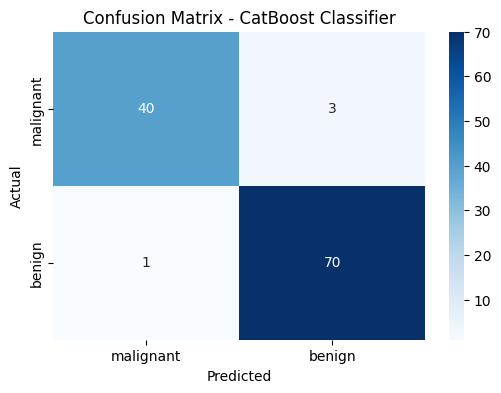

In [6]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("CatBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

### Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:
###● Data preprocessing & handling missing/categorical values
###● Choice between AdaBoost, XGBoost, or CatBoost
###● Hyperparameter tuning strategy
###● Evaluation metrics you'd choose and why
###● How the business would benefit from your model

####(Include your Python code and output in the code box below.)


**Answer:** This is a classification problem (predicting whether a customer will default = Yes/No).

1) Data preprocessing

   * Use Stratified K-Fold since data is imbalanced.

   * Missing values: CatBoost/XGBoost handle them; otherwise impute.

   * Categorical features: CatBoost encodes internally, while AdaBoost/XGBoost require one-hot/target encoding.

2) Choice of boosting method

   * AdaBoost: simple, less robust with noise/imbalance.

   * XGBoost: widely used, supports imbalance (scale_pos_weight), strong regularization.

   * CatBoost: best choice here (mixed features + missing values).

3) Hyperparameter tuning

   * Use Grid/Random Search with cross-validation.

   * Key params: n_estimators, max_depth, learning_rate, regularization terms.

4) Evaluation metrics

   * Use ROC-AUC and PR-AUC (good for imbalance).

   * Track Recall/F1 to reduce false negatives.

5) Preventing overfitting

   * Tune max_depth, learning_rate, add regularization, and use early stopping.

6) Business impact

   * Boosting helps identify risky borrowers, reduces defaults, improves loan pricing & approval decisions, and increases trust in credit risk systems.

In [7]:
# Loan Default Prediction using Boosting
# Classification Problem

import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from catboost import CatBoostClassifier

# 1) Create a synthetic dataset (1000 samples, 20 features)
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
    weights=[0.7, 0.3], random_state=42
)

# 2) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Initialize CatBoost
model = CatBoostClassifier(verbose=0, random_state=42)

# 4) Hyperparameter tuning (keep it simple)
params = {
    "depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "iterations": [200, 400]
}
grid = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=3)
grid.fit(X_train, y_train)

# 5) Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid.best_params_)
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'depth': 6, 'iterations': 400, 'learning_rate': 0.05}
ROC-AUC Score: 0.9581318551716004
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       139
           1       1.00      0.80      0.89        61

    accuracy                           0.94       200
   macro avg       0.96      0.90      0.92       200
weighted avg       0.94      0.94      0.94       200

